# Einsendeaufgabe Data Analyst - EUROPACE AG

Bewerber: Valerie Holtz

21.06.2022

## Darlehensanfragen in New York

Öffentlich verfügbaren Informationen über Darlehensanfragen und Gewährleistung des Darlehens in New York

### Table of content

- [read in data](#read_data)
- [explore data](#explore_data)
- [remove outliers](#outliers)
- [fill misisng values](#missing)
- [explore numeric features](#numeric)
- [explore categorical features](#cat)
- [summary](#summary)

### Imports

In [183]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import numpy as np
from numpy import mean, std

### Read in data
<a id='read_data'></a>

In [186]:
pwd = os.getcwd()

Description data

In [187]:
df_info = pd.read_csv(pwd + '/description.csv', sep=';', header=None, names = ['column', 'description'])

In [188]:
df_info.head()

,column,description
0,action_taken_name,"The action taken on the loan or application, s..."
1,agency_name,The federal agency to which the HMDA-reporting...
2,applicant_ethnicity_name,The ethnicity of the primary applicant.
3,applicant_income_000s,The gross annual income that the lender relied...
4,applicant_race_name_1,The first listed race for the primary applicant.


In [189]:
#helper function to easily get feature description

df_info = df_info.set_index('column')

def feat_info(col_name):
    print(df_info.loc[col_name]['description'])

In [190]:
feat_info('hud_median_family_income')

The median family income in dollars for the MSA/MD (Metropolitian Statistical Area/Metropolitian Division) in which the tract is located.


Sample data

In [191]:
df = pd.read_csv(pwd + '/sample.csv')

In [192]:
df.head(5)

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0


## Explore data
<a id='explore_data'></a>

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175862 entries, 0 to 175861
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken_name               175862 non-null  object 
 1   agency_name                     175862 non-null  object 
 2   applicant_ethnicity_name        175862 non-null  object 
 3   applicant_race_name_1           175862 non-null  object 
 4   applicant_sex_name              175862 non-null  object 
 5   applicant_income_000s           151344 non-null  float64
 6   co_applicant_ethnicity_name     175862 non-null  object 
 7   co_applicant_race_name_1        175862 non-null  object 
 8   co_applicant_sex_name           175862 non-null  object 
 9   county_name                     175377 non-null  object 
 10  denial_reason_name_1            23067 non-null   object 
 11  denial_reason_name_2            4650 non-null    object 
 12  denial_reason_na

In [194]:
df.dtypes

action_taken_name                  object
agency_name                        object
applicant_ethnicity_name           object
applicant_race_name_1              object
applicant_sex_name                 object
applicant_income_000s             float64
co_applicant_ethnicity_name        object
co_applicant_race_name_1           object
co_applicant_sex_name              object
county_name                        object
denial_reason_name_1               object
denial_reason_name_2               object
denial_reason_name_3               object
hoepa_status_name                  object
lien_status_name                   object
loan_purpose_name                  object
loan_type_name                     object
msamd_name                         object
owner_occupancy_name               object
preapproval_name                   object
property_type_name                 object
purchaser_type_name                object
hud_median_family_income          float64
loan_amount_000s                  

- not a small dataset, with quite a lot of categorical features
- some of the categorical features probably require feature engineering to be able to conduct valuable insights from them
-> for example categorical features with high cardinality that have too many unique values

In [195]:
#explore numeric features

df.describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
count,151344.000000,175178.000000,175862.000000,174951.000000,175020.000000,175166.000000,175166.000000
mean,140.596780,78158.378335,333.287771,1514.470783,1214.276243,29.182163,4749.017338
std,273.130096,16202.442285,1159.473567,792.348709,609.515566,29.027924,1878.994617
min,1.000000,57200.000000,1.000000,6.000000,3.000000,0.340000,1.000000
25%,58.000000,69000.000000,102.000000,967.000000,748.000000,7.760000,3444.000000
50%,90.000000,71300.000000,208.000000,1525.000000,1197.000000,17.200001,4554.000000
75%,141.000000,82700.000000,366.000000,2011.000000,1640.000000,39.320000,5892.000000
max,9999.000000,109000.000000,99999.000000,6345.000000,6454.000000,100.000000,26588.000000


- possible outliers for featues 'applicant_income_000s' and	'loan_amount_000s' as seen from max value in comparison to 75% -> to be further investigated

Missing values

In [196]:
df.isnull().sum()

action_taken_name                      0
agency_name                            0
applicant_ethnicity_name               0
applicant_race_name_1                  0
applicant_sex_name                     0
applicant_income_000s              24518
co_applicant_ethnicity_name            0
co_applicant_race_name_1               0
co_applicant_sex_name                  0
county_name                          485
denial_reason_name_1              152795
denial_reason_name_2              171212
denial_reason_name_3              174942
hoepa_status_name                      0
lien_status_name                       0
loan_purpose_name                      0
loan_type_name                         0
msamd_name                         14642
owner_occupancy_name                   0
preapproval_name                       0
property_type_name                     0
purchaser_type_name                    0
hud_median_family_income             684
loan_amount_000s                       0
number_of_1_to_4

- possibly investigate and fill missing values

Explore target feature

In [197]:
df['action_taken_name'].unique()     

array(['Application denied by financial institution',
       'Application withdrawn by applicant', 'Loan originated',
       'Loan purchased by the institution',
       'Application approved but not accepted',
       'File closed for incompleteness',
       'Preapproval request denied by financial institution'],
      dtype=object)

For the data analysis it would be interesting to additonally make a binary numeric feature out of this column.


In [198]:
#create binary feature loan_status

#Note: evtl. consult with financial expert on how to correclty one-hot-encode this feature 

my_list = ['Application denied by financial institution','Application withdrawn by applicant','File closed for incompleteness','Preapproval request denied by financial institution']

df['loan_status'] = df['action_taken_name'].apply(lambda x: 1 if x in (my_list) else 0)

In [199]:
df[['action_taken_name', 'loan_status']].head()

,action_taken_name,loan_status
0,Application denied by financial institution,1
1,Application withdrawn by applicant,1
2,Loan originated,0
3,Loan originated,0
4,Loan originated,0


Use feature 'loan_status'  to get information by looking at the correlation with other numeric features.

Explore distribution

0    121407
1     54455
Name: loan_status, dtype: int64
54455


Text(0.5, 1.0, 'Action taken on the loan')

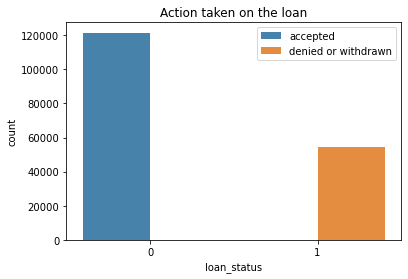

In [200]:
#is the target feature evenly distributed or is the dataset imbalanced?

plt.figure()
sns.countplot(x='loan_status', data=df,hue='loan_status', alpha=0.9)
print(df['loan_status'].value_counts())
print(df['loan_status'].sum())
plt.legend(labels = ['accepted','denied or withdrawn'])
plt.title('Action taken on the loan')

We're dealing with a slightly imbalanced dataset, with the majority of the loan applications being accepted. Still, the number of denied applications is high enough to get valuable insights from it.

Text(0.5, 1.0, 'Action taken on the loan')

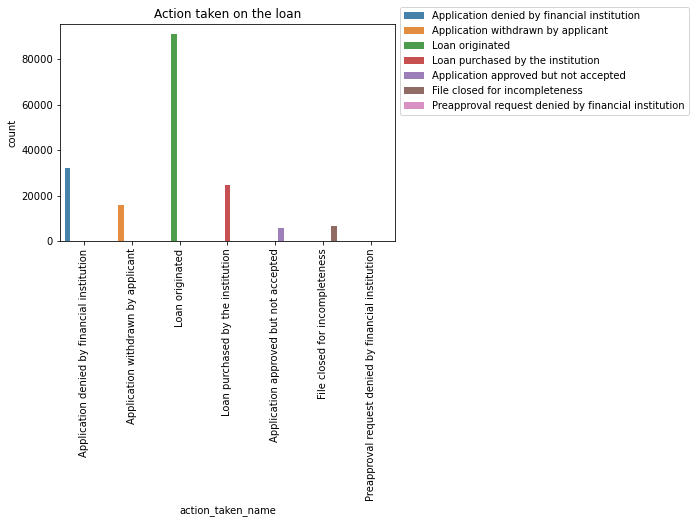

In [201]:
#for comparison plot originall feature
plt.figure()
sns.countplot(x='action_taken_name', data=df,hue='action_taken_name', alpha=0.9)
plt.legend(bbox_to_anchor=(1, 1.1), loc=2)
plt.xticks(rotation=90)
plt.title('Action taken on the loan')

First assumptions about the data:

- As we one-hot encoded the target column, it will be easy now to plot all features against this column and discover interesting patterns.

- Investigate correlation of featues with each other and with target column to discover patterns and see in which direction the analysis could go.

- There are a lot of categoric features, including several features about gender and ethnicity. Probably we find some redundant features here, that may be dropped.
                                            
- The categorical features probably carry a lot of information that we can only access through some feature engineering, e.g. making them numeric.

- For some features we have a lot of missing values. Some are probably data specific like 'denial_reason_name' having a missing value when loan is approved.

- Numeric features like income and loan amount probably have outliers that skew the data to the extreme.

- After one-hot encoding the target column, we see that the dataset is imbalanced. Still the two categories are big enough that we can gain insight from comparing the two categories 'denied' and 'approved'.

Thus the general guideline question for this analysis will be:

### What factors lead to a loan being deinied or accepted?

## Fill misisng values
<a id='missing'></a>

In [202]:
# % of missing values in the loan data
sort_missing_id = df.isnull().sum() * 100 / len(df)
sort_missing_id.sort_values(ascending=False)

denial_reason_name_3              99.476863
denial_reason_name_2              97.355881
denial_reason_name_1              86.883465
applicant_income_000s             13.941613
msamd_name                         8.325846
number_of_1_to_4_family_units      0.518020
number_of_owner_occupied_units     0.478785
population                         0.395765
minority_population                0.395765
hud_median_family_income           0.388941
county_name                        0.275784
property_type_name                 0.000000
preapproval_name                   0.000000
action_taken_name                  0.000000
purchaser_type_name                0.000000
loan_amount_000s                   0.000000
owner_occupancy_name               0.000000
lien_status_name                   0.000000
loan_type_name                     0.000000
loan_purpose_name                  0.000000
agency_name                        0.000000
hoepa_status_name                  0.000000
co_applicant_sex_name           

- The three denial reason features have  a lot of missing values. This makes sense, as a majority of the loans are being accepted as we see from the target column. Still, this feature could be dropped or ignored for the further analysis.
- Feature 'applicant_income_000s' has 13% of entries missing. Here we fill the missing value with the median instead of the mean, as this also is a column that is skewed to the right, meaning it has some entries with really high income numbers.
- Feature 'masamd' has 8% missing values. As it is a categorical feature, we can either fill it with the modus or 'unknown' as there might be some information/pattern to be found here.
- The other missing values are under 1%. We could fill them, but in this case it's easier to drop the rows with missing values, as we have a big enough dataset.

In [203]:
df['applicant_income_000s'].fillna(df['applicant_income_000s'].median(),inplace=True)

df['msamd_name'].fillna('unknown',inplace=True)

df['denial_reason_name_1'].fillna('unknown',inplace=True)

df = df.dropna(axis=0, subset=['number_of_1_to_4_family_units','number_of_owner_occupied_units','population','minority_population','hud_median_family_income','county_name'])

In [204]:
sort_missing_id = df.isnull().sum() * 100 / len(df)
sort_missing_id.sort_values(ascending=False)

#now only denial reason features are left, which we will leave like that for this analysis

denial_reason_name_3              99.479479
denial_reason_name_2              97.368225
action_taken_name                  0.000000
loan_type_name                     0.000000
population                         0.000000
minority_population                0.000000
number_of_owner_occupied_units     0.000000
number_of_1_to_4_family_units      0.000000
loan_amount_000s                   0.000000
hud_median_family_income           0.000000
purchaser_type_name                0.000000
property_type_name                 0.000000
preapproval_name                   0.000000
owner_occupancy_name               0.000000
msamd_name                         0.000000
lien_status_name                   0.000000
loan_purpose_name                  0.000000
agency_name                        0.000000
hoepa_status_name                  0.000000
denial_reason_name_1               0.000000
county_name                        0.000000
co_applicant_sex_name              0.000000
co_applicant_race_name_1        

## Remove outliers
<a id='outliers'></a>

In [205]:
#two features seem to have outliers

df[['applicant_income_000s','loan_amount_000s']].describe()

#either we have outliers here or some really high income and resulting loans

,applicant_income_000s,loan_amount_000s
count,174825.000000,174825.000000
mean,133.558719,332.068611
std,254.071021,1150.699441
min,1.000000,1.000000
25%,63.000000,103.000000
50%,90.000000,208.000000
75%,130.000000,366.000000
max,9999.000000,99999.000000


In [206]:
df['applicant_income_000s'].sort_values().tail(20)
#the 9999.0 at the end looks suspicious, maybe really high salaries are coded like that in the dataset

139272    9999.0
48582     9999.0
111684    9999.0
86791     9999.0
36786     9999.0
109391    9999.0
40587     9999.0
71032     9999.0
123545    9999.0
125682    9999.0
151602    9999.0
27976     9999.0
85925     9999.0
135573    9999.0
144116    9999.0
54144     9999.0
26324     9999.0
52209     9999.0
109039    9999.0
169881    9999.0
Name: applicant_income_000s, dtype: float64

In [207]:
#the same wee see again with the feature loan amount
df['loan_amount_000s'].sort_values().tail(20)

55198     41668
136019    54000
105879    54000
133662    57000
159019    57500
21328     59000
122752    60000
5698      60000
52150     71191
138716    72164
139886    86304
28818     90200
155869    99999
102400    99999
62737     99999
40147     99999
65264     99999
126573    99999
29167     99999
55357     99999
Name: loan_amount_000s, dtype: int64

/Users/valerie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='applicant_income_000s', ylabel='Density'>

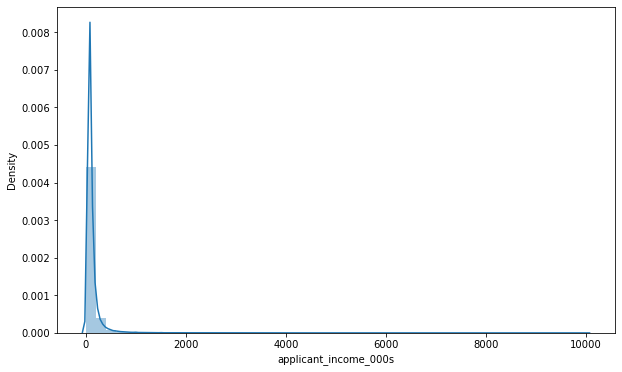

In [208]:
#plot distribution
plt.figure(figsize=(10,6))
sns.distplot(df['applicant_income_000s'])

We see a really long tail, meaning the data is heavily skewed to the right. This is either a mistake in the data or we have some people with a really high salary. Anyway, this is not giving a real picture about the general income distribution in the data so let's remove the long tail.

/Users/valerie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount_000s', ylabel='Density'>

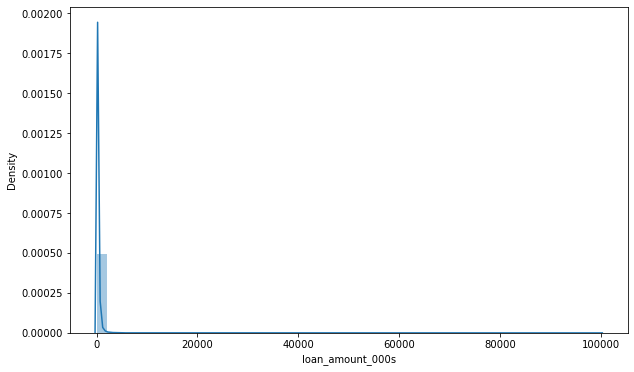

In [209]:
#the same we see for loan amount feature
plt.figure(figsize=(10,6))
sns.distplot(df['loan_amount_000s'])

#question based on skewed distribution: these outliers mean that people with really high salaries also apply for high loans or is it a mistake in the data?

Identify and remove outliers

In [210]:
#calculate summary statistics
data_mean, data_std = mean(df['loan_amount_000s']), std(df['loan_amount_000s'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
#identify outliers
outliers = [x for x in df['loan_amount_000s'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 842


In [211]:
# calculate summary statistics
data_mean, data_std = mean(df['applicant_income_000s']), std(df['applicant_income_000s'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in df['applicant_income_000s'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 1843


The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

- 1 Standard Deviation from the Mean: 68%
- 2 Standard Deviations from the Mean: 95%
- 3 Standard Deviations from the Mean: 99.7%

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution.

Z score or standard score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

In [212]:
#removing outlier by values of z-score above 3
print ("Shape Before: ",df.shape)

df = df[np.abs(df["loan_amount_000s"]-df["loan_amount_000s"].mean())<=(3*df["loan_amount_000s"].std())]
df = df[np.abs(df["applicant_income_000s"]-df["applicant_income_000s"].mean())<=(3*df["applicant_income_000s"].std())]
print ("Shape without Outliers: ",df.shape)

Shape Before:  (174825, 29)
Shape without Outliers:  (171919, 29)


/Users/valerie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount_000s', ylabel='Density'>

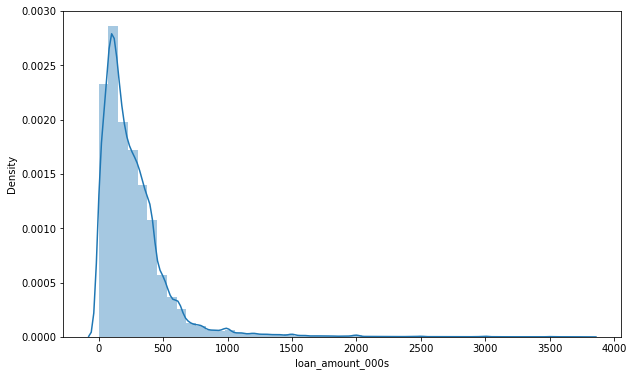

In [213]:
plt.figure(figsize=(10,6))
sns.distplot(df['loan_amount_000s'])

#the distribution is still skewed, meaning some high salaries, but we removed the extreme outliers.

In [214]:
df[['applicant_income_000s','loan_amount_000s']].describe()

#we removed the outliers

,applicant_income_000s,loan_amount_000s
count,171919.000000,171919.000000
mean,113.303096,273.213385
std,93.369068,289.884041
min,1.000000,1.000000
25%,62.000000,101.000000
50%,90.000000,204.000000
75%,127.000000,357.000000
max,781.000000,3780.000000


## Explore numeric features
<a id='numeric'></a>

In [215]:
#only get numeric features
numeric_feature_mask = df.dtypes!=object
numeric_features = df.columns[numeric_feature_mask].tolist()

In [216]:
df[numeric_features]

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,loan_status
0,176.0,60000.0,235,2605.0,930.0,6.850000,2979.0,1
1,53.0,69000.0,108,2053.0,821.0,33.580002,4416.0,1
2,223.0,71300.0,659,497.0,387.0,49.959999,1363.0,0
3,43.0,71300.0,103,251.0,558.0,32.090000,1960.0,0
4,72.0,60000.0,45,1514.0,1003.0,2.120000,3391.0,0
...,...,...,...,...,...,...,...,...
175857,118.0,109000.0,300,1470.0,1337.0,17.110001,4448.0,0
175858,27.0,69700.0,88,1719.0,1490.0,16.040001,4658.0,0
175859,215.0,109000.0,205,1547.0,1455.0,7.730000,4671.0,0
175860,116.0,71300.0,200,1743.0,1534.0,19.969999,5484.0,0


 Explore correlation between features and with target column

<AxesSubplot:>

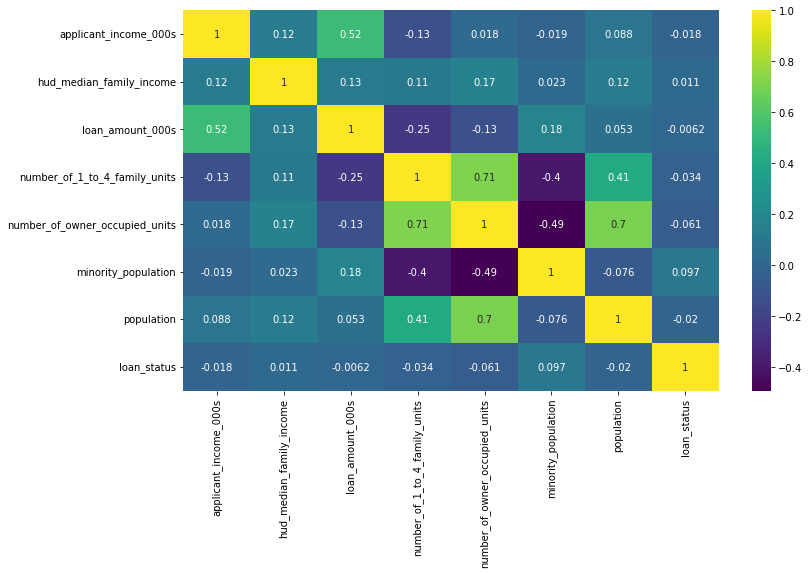

In [217]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Which features are correlated with the target the most? Do we see correlation between the features?

- We don't see a really strong correlation between the target feature 'loan_status' and other features. But there is a slight correlation with the feature 'minority_population'. 
- This means, it will be interesting to look at the social features like ethnicity, gender etc. that we find as categoric variables and see how they plot against the target feature.
- Of course features like loan_amount and applicant_income are correlated, meaning people with a higher income also apply for higher loans. 
- We also see a negative correlation between 'minority_population' and features like 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units'. This let's us make conclusions on the socioeconomic status of minority population. Even if this feature is not heavily correlated with the target column, it could be further investigated in the course of this analysis.
 - A further step would be to get some of the categorical variables numeric and explore the correlation here and get more insights what socioeconomic factors influence if a persons gets rejected or approved for a loan.

#### EDA for numeric features

A first step is to investigate the loan amount and income in relationship with the target feature.

In [218]:
#subsets to seperatley investigate the features for denied and approved loans
df_denied = df.loc[df['loan_status'] ==1]
df_accepted = df.loc[df['loan_status'] ==0]

Text(0.5, 1.0, 'Loan approved')

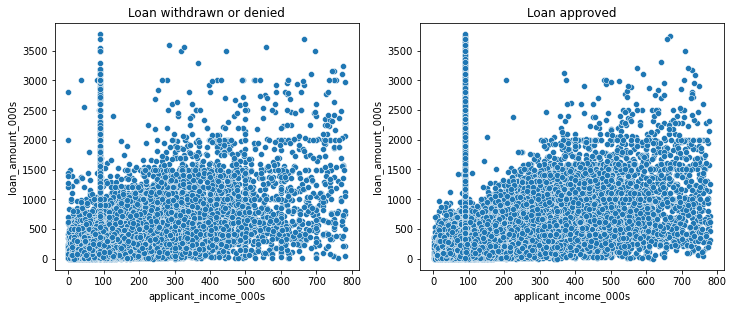

In [219]:
plt.figure(figsize=(12,10))

plt.subplot(221)
sns.scatterplot(x='applicant_income_000s',y='loan_amount_000s', data=df_denied)
plt.title('Loan withdrawn or denied')

plt.subplot(222)
sns.scatterplot(x='applicant_income_000s',y='loan_amount_000s', data=df_accepted)
plt.title('Loan approved')

- If we compare the graphs for denied and approved loans, we see that the combination of a high loan amount and a lower income can lead to a loan being denied
- For the approved loans we see that there is a positive correlation between applicant income and loan amount. Higher loans get accepted when the income matches.
- There is a noticeable pattern in the data at 100.000. This should be further investigated.

Explore which numeric features have an effect on a loan being denied or apprived/withdrawn

Text(0.5, 1.0, 'Loan amount by loan status')

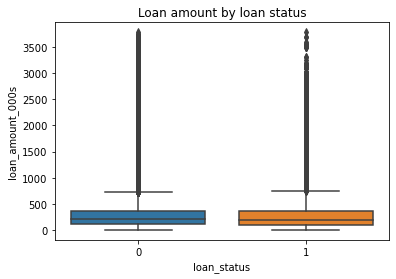

In [220]:
#further investigate loan amount feature

sns.boxplot(x='loan_status',y='loan_amount_000s',data=df)
plt.title('Loan amount by loan status')

We see that loan amount alone is not the deciding factor for approving or denying a loan.

In [221]:
df.groupby('loan_status')['loan_amount_000s'].describe()
#only a slight difference here in the numbers between denied and approved

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,119093.0,274.408059,285.770024,1.0,107.0,206.0,358.0,3777.0
1,52826.0,270.520066,298.936462,1.0,90.0,200.0,356.0,3780.0


#### Explore income features in relationship to loan status

Text(0.5, 1.0, 'Applicant income')

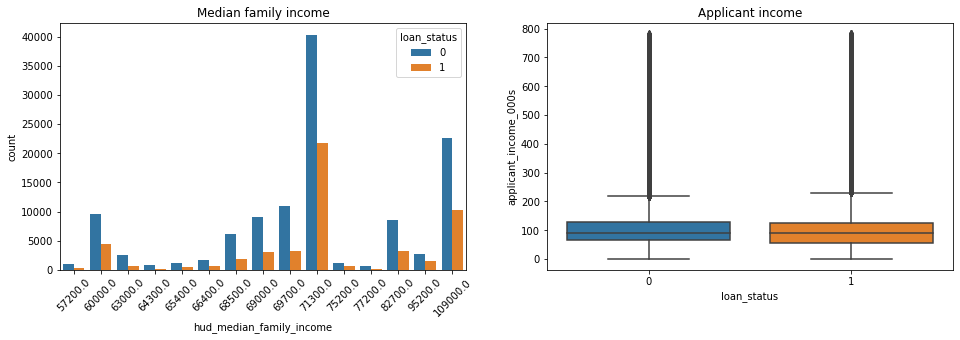

In [222]:
plt.figure(figsize=(16,10))

plt.subplot(221)
sns.countplot(x='hud_median_family_income', hue = 'loan_status', data=df)
plt.xticks(rotation=45)
plt.title('Median family income')

plt.subplot(222)
sns.boxplot(x='loan_status',y='applicant_income_000s', data=df)
plt.title('Applicant income')

In [223]:
df.groupby('loan_status')['applicant_income_000s','hud_median_family_income'].describe()

/var/folders/2f/lk12d48976zgcfccgd8q1c6r0000gn/T/ipykernel_81471/2622169511.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('loan_status')['applicant_income_000s','hud_median_family_income'].describe()


applicant_income_000s                                          \
                            count        mean        std  min   25%   50%   
loan_status                                                                 
0                        119093.0  114.405540  91.511696  1.0  66.0  90.0   
1                         52826.0  110.817703  97.381703  1.0  56.0  90.0   

                          hud_median_family_income                \
               75%    max                    count          mean   
loan_status                                                        
0            127.0  781.0                 119093.0  78031.023654   
1            126.0  781.0                  52826.0  78421.784727   

                                                                         
                      std      min      25%      50%      75%       max  
loan_status                                                              
0            16199.818302  57200.0  69000.0  71300.0  82700.0  109000.0  
1            16270.891362  57200.0  69700.0  71300.0  82700.0  109000.0

- Looking at the graphs, we don't see a real pattern here. 
- Looking at the numbers, we see that a slightly higher income definitely help getting a loan. 
- Still, the difference in median family income and applicant income is so small, that they can't be the deciding factor alone when denying or approving loans.

 For the correlation heatmap we concluded, that minority population could be an important factor for our analysis.

#### Explore minortiy population

In [224]:
feat_info('minority_population')

The percentage of minority population to total population for the census tract, carried to two decimal places.


Text(0.5, 1.0, 'General population')

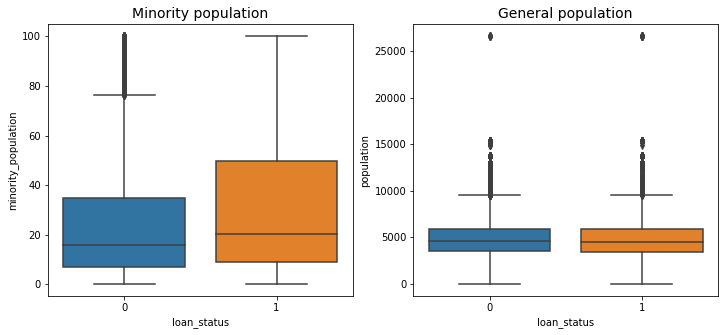

In [225]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x='loan_status',y='minority_population',ax=ax[0], data=df)
ax[0].set_title('Minority population', fontsize=14)

sns.boxplot(x='loan_status',y='population', ax=ax[1],data=df)
ax[1].set_title('General population', fontsize=14)

Here we clearly see that people that life in an area with higher minority population are more likely to get their loan denied. It could be concluded, that people belonging to a minority population are more likely getting their loans denied or withdrawn. As these are categoric features in our dataset, this will be explored in the next part. 

For now only minority population seems to make a clear differnce if a loan is being denied or not, more so than income or loan amount. We will investigate this further in the categoric data. Probably a combination of these features will give great insights. For example, is ethnicity the deciding factor in a loan being denied or approved or only in combination with low or high income?

## Explore categorical features
<a id='cat'></a>

In [226]:
#only get categorical features
cat_feature_mask = df.dtypes==object
cat_features = df.columns[cat_feature_mask].tolist()

In [227]:
df[cat_features]

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,denial_reason_name_1,...,denial_reason_name_3,hoepa_status_name,lien_status_name,loan_purpose_name,loan_type_name,msamd_name,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,Collateral,...,NaN,Not a HOEPA loan,Secured by a first lien,Refinancing,Conventional,unknown,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,No co-applicant,No co-applicant,No co-applicant,Erie County,unknown,...,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,FHA-insured,"Buffalo, Cheektowaga, Niagara Falls - NY",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,Not Hispanic or Latino,White,Female,Queens County,unknown,...,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"New York, Jersey City, White Plains - NY, NJ",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,No co-applicant,No co-applicant,No co-applicant,Queens County,unknown,...,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"New York, Jersey City, White Plains - NY, NJ",Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,No co-applicant,No co-applicant,No co-applicant,Steuben County,unknown,...,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,unknown,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,No co-applicant,No co-applicant,No co-applicant,Nassau County,unknown,...,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"Nassau County, Suffolk County - NY",Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Affiliate institution
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,No co-applicant,No co-applicant,No co-applicant,Monroe County,unknown,...,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,FHA-insured,Rochester - NY,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage..."
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,Not Hispanic or Latino,White,Female,Nassau County,unknown,...,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"Nassau County, Suffolk County - NY",Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA)
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,No c

Questions

- are features on sex and race and ethnicity redundant?

- are there categorical feature that have high cardinality/too many unique values?

In [228]:
df['applicant_ethnicity_name'].unique()

array(['Not Hispanic or Latino', 'Not applicable', 'Hispanic or Latino',
       'Information not provided by applicant in mail, Internet, or telephone application'],
      dtype=object)

In [229]:
df['applicant_race_name_1'].unique()

array(['White', 'Asian', 'Not applicable',
       'Information not provided by applicant in mail, Internet, or telephone application',
       'Black or African American', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

First impressions
- take race istead of ethnicity column for further analysis as it seems to give better insights
- none of the categoric features are too cardinal for analysis, except maybe county_name
- all of the categoric features are potentially interesting to plot against the target column and in combination with the numeric features
- the 3 denial reason features have too many missing values. This should be taken into account when analyzing.
- possibly feature engineer some of the categoric features to make them numeric and get the correlation with other features

##### Create new features

One-hot encode race and gender features, as the analysis of the target column with the numeric feature 'minority_population' has shown that we could discover interesting insights here.

In [230]:
#get numeric features
df['applicant_race'] = df['applicant_race_name_1'].apply(lambda x: 0 if x=='White' else 1)
df['co_applicant_race'] = df['co_applicant_race_name_1'].apply(lambda x: 0 if x=='White' else 1)
df['applicant_sex'] = df['applicant_sex_name'].apply(lambda x: 0 if x=='Male' else 1)
df['co_applicant_sex'] = df['co_applicant_sex_name'].apply(lambda x: 0 if x=='Male' else 1)

<AxesSubplot:>

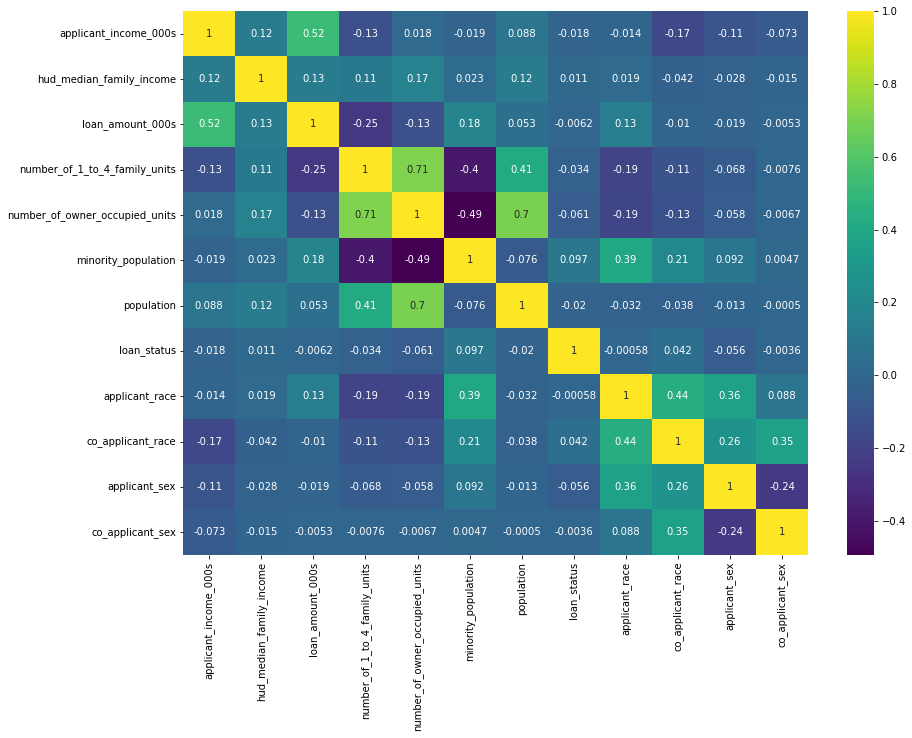

In [231]:
#explore correlation of new features
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

- As expected, we see some interesting correlations between applicant race and other features.
- We don't really see a correlation bewteen the gender or race features with the target column 'loan_status'.
- There is a slight negative correlation between income and co_applicant_race and a slightly lesser negative correlation between income and gender.
- We see a correlation between race and loan amount.
- Interestingly, there is no strong correlation between loan amount and gender.
- We see a negative correlation between race and 'number_of_1_to_4_family_units' and 'number_of_owner_occupied_units'.

In [232]:
feat_info('number_of_1_to_4_family_units')

The number of dwellings in the tract that are built to house fewer than 5 families.


In [233]:
feat_info('number_of_owner_occupied_units')

The number of dwellings in the tract that are lived in by the owner.


It could be argued, that owner occupied units and units that house fewer families are more expensive to buy and live in. Thus, these features are also negatively correlated with loan amount. As they're also negatively correlated with race, here could be an interesting connection for further analysis.

Gender and race prove to be interesting features in this dataset and will be further analyzed in combination with other features and the target feature.

### EDA for categorical features

Get first overview over race and gender features in correlation with target feature.

Text(0.5, 1.0, 'Loan status by gender')

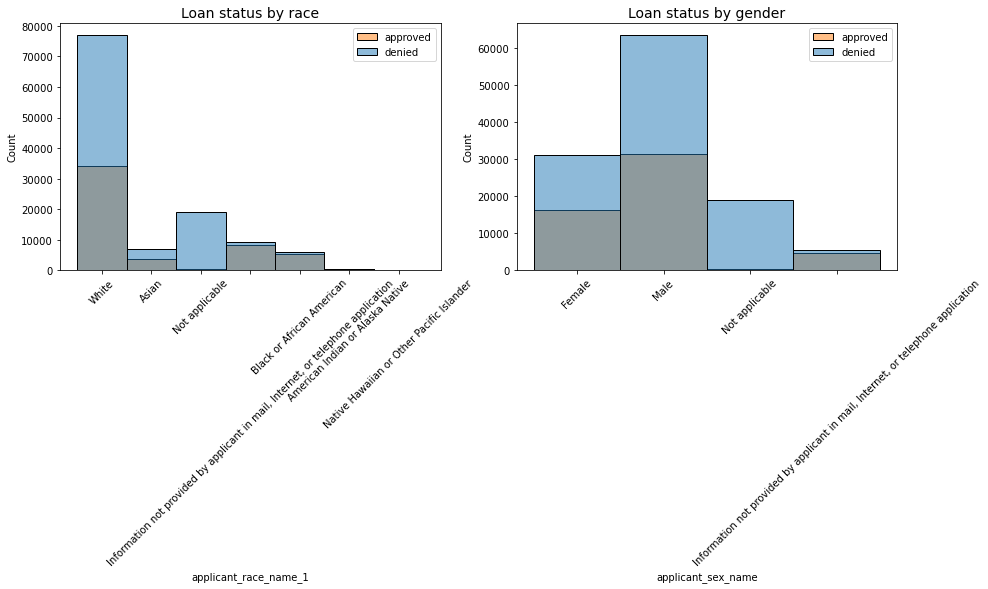

In [261]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=df, x='applicant_race_name_1', hue='loan_status')
plt.xticks(rotation=45)
plt.legend(['approved', 'denied'])
plt.title('Loan status by race', fontsize=14)

plt.subplot(222)
sns.histplot(data=df, x='applicant_sex_name', hue='loan_status')
plt.xticks(rotation=45)
plt.legend(['approved', 'denied'])
plt.title('Loan status by gender', fontsize=14)

When comparing male and female loan applicants, we see a general higher number of men applying to get loans than womem. But we don't generally see a higher amount of women getting their loans denied, when looking at the overall female applicants.

This looks different when looking at the race feature. Overall we see a much higher number of white applicants than people, that identify as a different race. Naturally, this also means, that a lot of white applicants are getting their loans denied, but with an overall high number getting their loans approved.

If we look at the different ethnical groups, we see a different picture. For example Black or African American applicants are applying for loans in a really small number, but they're getting almost as much loans denied as getting them accepted. Asians are applying for loans in a bigger number than the other minorities and are showing the same pattern as the white population.

So mostly white men are applying for loans. The chances of them getting their loan approved are as high as getting them denied. The same we see for women in general, although the numbers here are much smaller. In a next step, it would be interesting to see what results the combination of gender and race brings to light in combination with the target column. How are the other categorical features playing into this?

The next step of the analysis is to find the features that are influencing the target column by looking at them under different viewpoints like race, gender and the general population.

In [235]:
#subsets to further investigate reasons for denied loans
df_denied = df.loc[df['loan_status'] ==1]
df_accepted = df.loc[df['loan_status'] ==0]

Text(0.5, 1.0, 'Loan status for minority population by gender')

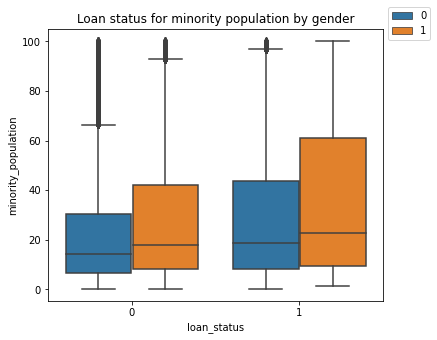

In [264]:
plt.figure(figsize=(6,5))
sns.boxplot(x='loan_status', y="minority_population", hue="applicant_sex", data=df)
plt.legend(bbox_to_anchor=(1, 1.1), loc=2)
plt.title('Loan status for minority population by gender')

Just looking how the target column is influenced by ethnicity and gender, we see a clear pattern here with two interesting findings:
- a person living in an area with high minority population is more likely to get their loan denied
- we also see an even stronger likelihood for women getting their loans denied or withdrawn when looking at the overalll minority population.

In a next step, the different categorical features will be investigated.

Guideline question: 

 Which categorical features matter most in combination with gender and race?

#### Explore agency_name

In [237]:
feat_info('agency_name')

The federal agency to which the HMDA-reporting institution submits its HMDA data.


Home Mortgage Disclosure Act - display information to the public
show whether financial institutions are serving the housing credit needs of the neighborhoods and communities in which they are located.


Text(0.5, 1.0, 'Loan accepted by agency')

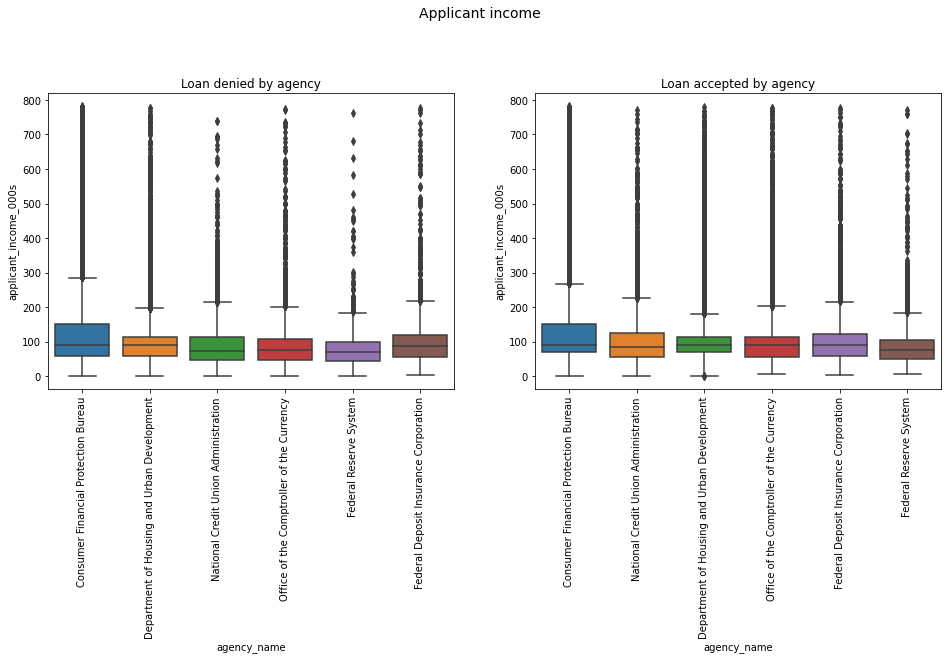

In [238]:
plt.figure(figsize=(16,12))
plt.suptitle('Applicant income', fontsize=14)

plt.subplot(221)
sns.boxplot(x='agency_name',y='applicant_income_000s', data=df_denied)
plt.xticks(rotation=90)
plt.title('Loan denied by agency', fontsize=12)

plt.subplot(222)
sns.boxplot(x='agency_name',y='applicant_income_000s', data=df_accepted)
plt.xticks(rotation=90)
plt.title('Loan accepted by agency', fontsize=12)

Here we see, that there is no real difference between the agencies on how loans are denied or approved based on the applicant's income alone.
 
Does this look the same when we add the feature minority population?

Text(0.5, 1.0, 'Loan accepted by agency')

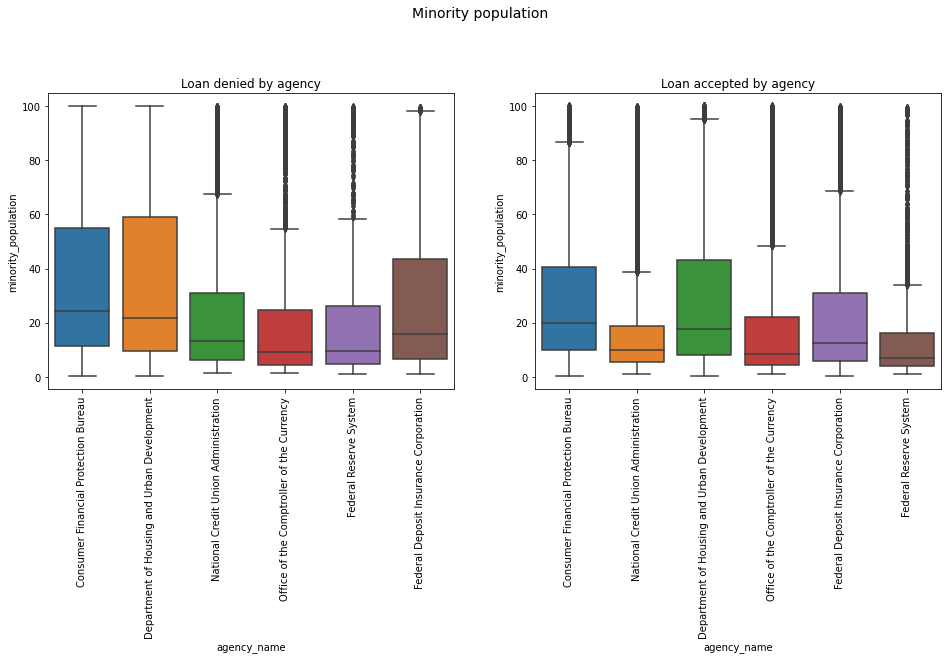

In [239]:
plt.figure(figsize=(16,12))
plt.suptitle('Minority population', fontsize=14)

plt.subplot(221)
sns.boxplot(x='agency_name',y='minority_population', data=df_denied)
plt.xticks(rotation=90)
plt.title('Loan denied by agency', fontsize=12)

plt.subplot(222)
sns.boxplot(x='agency_name',y='minority_population', data=df_accepted)
plt.xticks(rotation=90)
plt.title('Loan accepted by agency', fontsize=12)

Here we see a different pattern. For one, the number of denied or withdrawn loans is overall higher than the number of accepted loans for minority population with all agencies. Noticeable is the spike for denying loans with the Department for Housing an Urban Development and the Consumer Fiancial Protection Bureau.

Do we see the same pattern for gender?

Text(0.5, 1.0, 'Loan denied by gender')

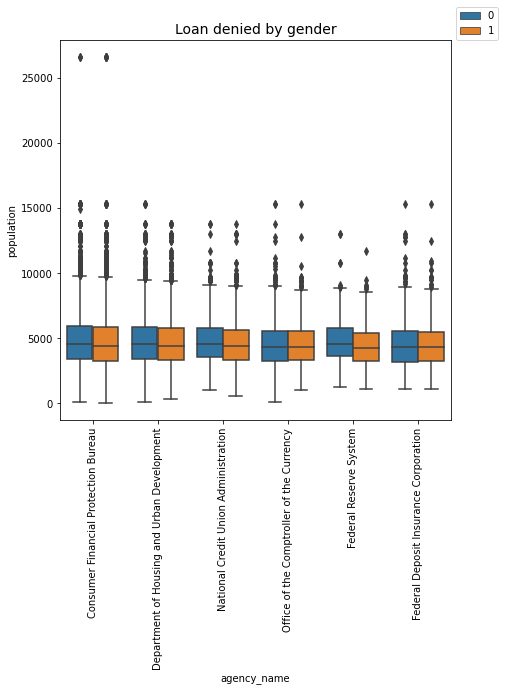

In [265]:
plt.figure(figsize=(7,7))
sns.boxplot(x='agency_name',y='population', hue='applicant_sex', data=df_denied)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1, 1.1), loc=2)
plt.title('Loan denied by gender', fontsize=14)

For gender we don't see the same pattern as for race when we look at denied or withdrawn loans per agency, as the numbers are equally distributed. 

This changes when we look at a combination of gender and minority population.

Text(0.5, 1.0, 'Loan denied by gender and minority population')

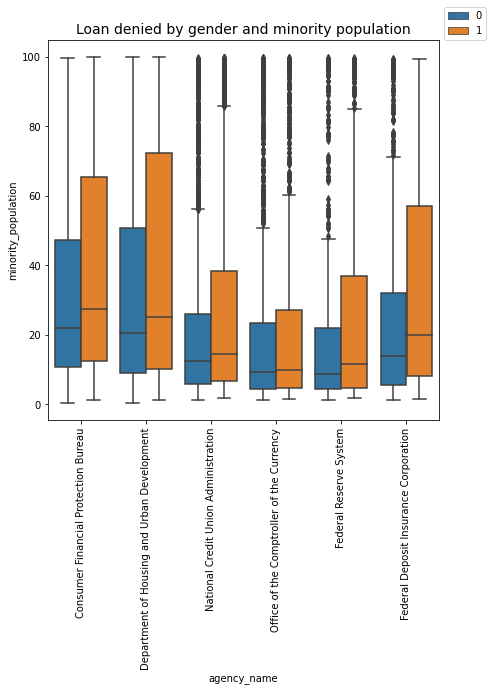

In [266]:
plt.figure(figsize=(7,7))
sns.boxplot(x='agency_name',y='minority_population', hue='applicant_sex', data=df_denied)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1, 1.1), loc=2)
plt.title('Loan denied by gender and minority population', fontsize=14)

Indeed the numbers for women in areas with high minority population getting their loan denied or withdrawn are higher in all cases.

Will we see this pattern when we look at some of the other categorical features?

#### Explore denial reason

[Text(0, 0, 'Collateral'),
 Text(1, 0, 'unknown'),
 Text(2, 0, 'Debt-to-income ratio'),
 Text(3, 0, 'Credit history'),
 Text(4, 0, 'Employment history'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'Insufficient cash (downpayment, closing costs)'),
 Text(7, 0, 'Credit application incomplete'),
 Text(8, 0, 'Unverifiable information'),
 Text(9, 0, 'Mortgage insurance denied')]

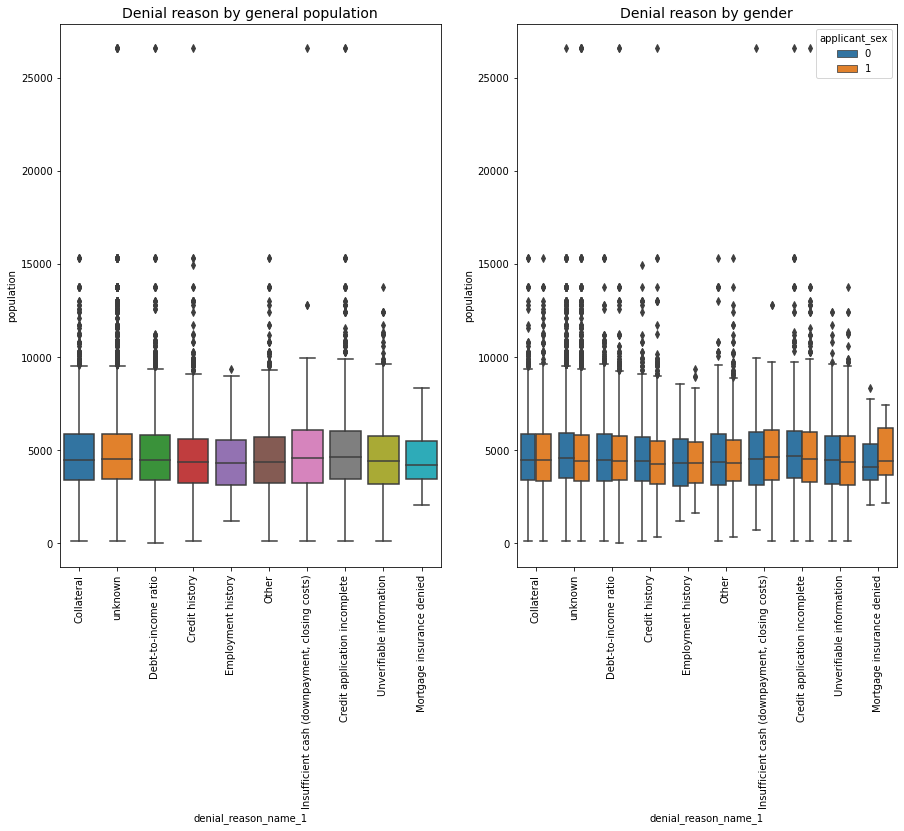

In [242]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
list = df['denial_reason_name_1'].unique()

sns.boxplot(x='denial_reason_name_1',y='population',ax=ax[0], data=df_denied)
ax[0].set_title('Denial reason by general population', fontsize=14)
ax[0].set_xticklabels(list, rotation = 90)

sns.boxplot(x='denial_reason_name_1',y='population',ax=ax[1], hue='applicant_sex', data=df_denied)
ax[1].set_title('Denial reason by gender', fontsize=14)
ax[1].set_xticklabels(list, rotation = 90)

[Text(0, 0, 'Collateral'),
 Text(1, 0, 'unknown'),
 Text(2, 0, 'Debt-to-income ratio'),
 Text(3, 0, 'Credit history'),
 Text(4, 0, 'Employment history'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'Insufficient cash (downpayment, closing costs)'),
 Text(7, 0, 'Credit application incomplete'),
 Text(8, 0, 'Unverifiable information'),
 Text(9, 0, 'Mortgage insurance denied')]

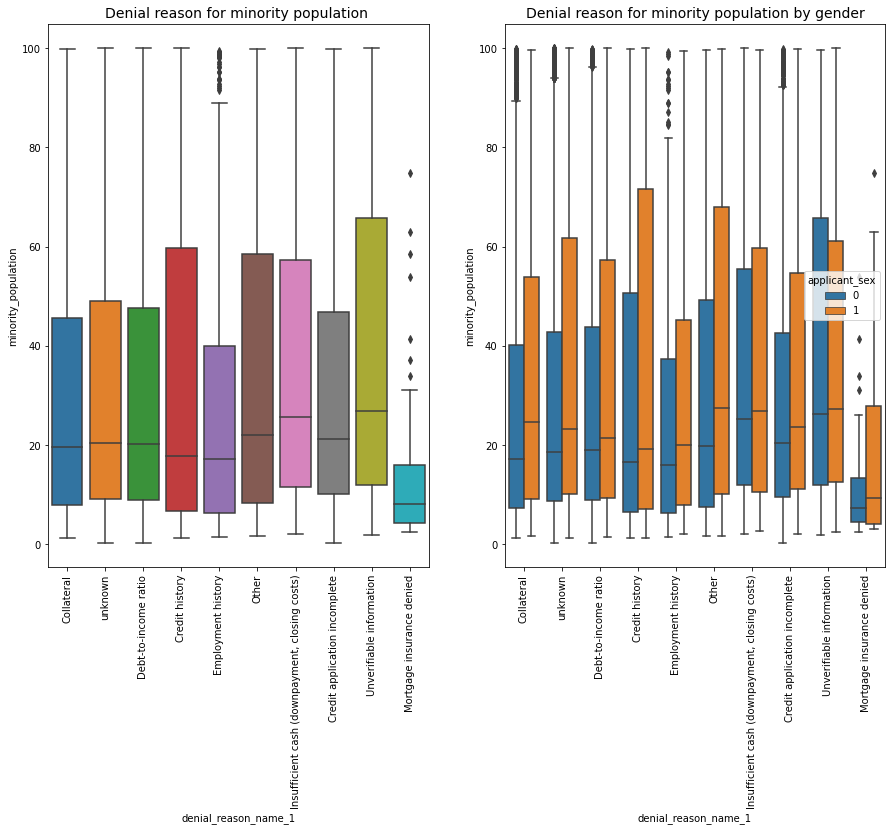

In [270]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
list = df['denial_reason_name_1'].unique()

sns.boxplot(x='denial_reason_name_1',y='minority_population',ax=ax[0], data=df_denied)
ax[0].set_title('Denial reason for minority population ', fontsize=14)
ax[0].set_xticklabels(list, rotation = 90)

sns.boxplot(x='denial_reason_name_1',y='minority_population',ax=ax[1], hue='applicant_sex', data=df_denied)
ax[1].set_title('Denial reason for minority population by gender', fontsize=14)
ax[1].set_xticklabels(list, rotation = 90)

For denial reason we see the same pattern as for the agency feature. Evenly distributed among the general population and for gender, but spikes when we look at the minority population. And when we further look at minority population by gender this pattern deepens.

#### Explore loan_type

In [273]:
feat_info('loan_type_name')

The type of loan applied for. Many loans are insured or guaranteed by government programs offered by Federal Housing Administration (FHA), the Department of Veterans Affairs (VA), or the Department of Agriculture's Rural Housing Service (RHS) or Farm Service Agency (FSA). All other loans are classified as conventional.


[Text(0, 0, 'Conventional'),
 Text(1, 0, 'FHA-insured'),
 Text(2, 0, 'VA-guaranteed'),
 Text(3, 0, 'FSA/RHS-guaranteed')]

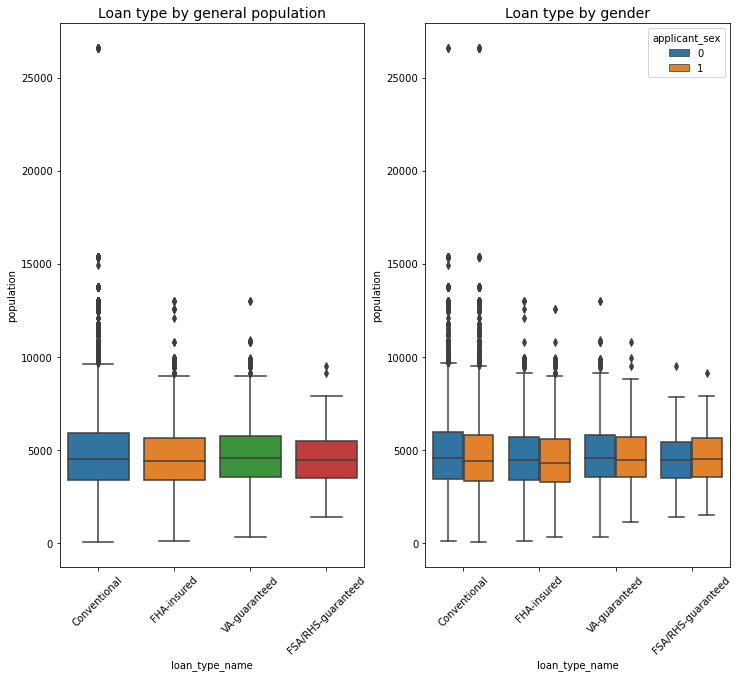

In [268]:
fig, ax = plt.subplots(1, 2, figsize=(12,10))
list = df['loan_type_name'].unique()

sns.boxplot(x='loan_type_name',y='population',ax=ax[0], data=df_denied)
ax[0].set_title('Loan type by general population', fontsize=14)
ax[0].set_xticklabels(list, rotation = 45)

sns.boxplot(x='loan_type_name',y='population',ax=ax[1], hue='applicant_sex', data=df_denied)
ax[1].set_title('Loan type by gender', fontsize=14)
ax[1].set_xticklabels(list, rotation = 45)

[Text(0, 0, 'Conventional'),
 Text(1, 0, 'FHA-insured'),
 Text(2, 0, 'VA-guaranteed'),
 Text(3, 0, 'FSA/RHS-guaranteed')]

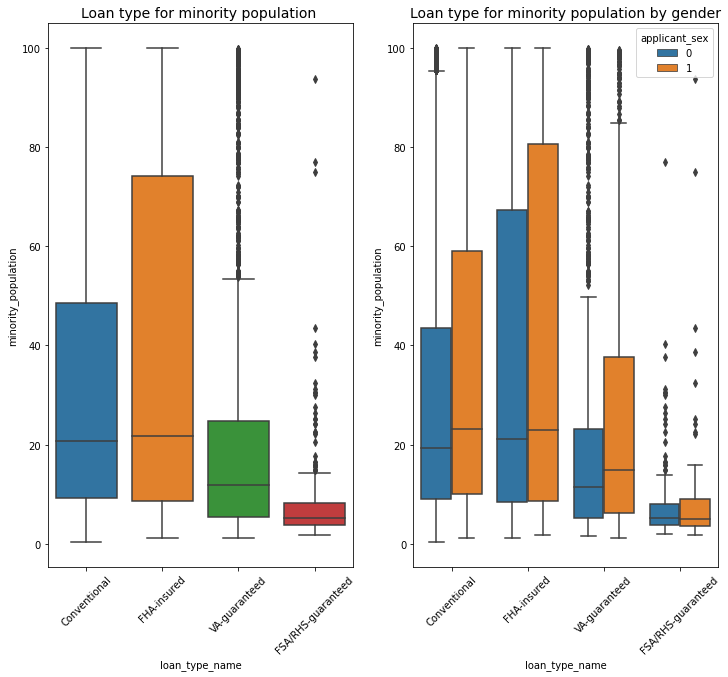

In [271]:
fig, ax = plt.subplots(1, 2, figsize=(12,10))
list = df['loan_type_name'].unique()

sns.boxplot(x='loan_type_name',y='minority_population',ax=ax[0], data=df_denied)
ax[0].set_title('Loan type for minority population ', fontsize=14)
ax[0].set_xticklabels(list, rotation = 45)

sns.boxplot(x='loan_type_name',y='minority_population',ax=ax[1], data=df_denied, hue='applicant_sex')
ax[1].set_title('Loan type for minority population by gender', fontsize=14)
ax[1].set_xticklabels(list, rotation = 45)

Again, a noticeable pattern we only see for minority population as they tend to apply especially for FHA-insured loans and conventional loans and hardly for FSA/RHS-guaranteed loans, whereas the other groups have more or less the same distribution for all loan types. 

Again a pattern for gender we only see when we look at gender in the context of minority population.

#### Explore HOEPA status

In [246]:
feat_info('hoepa_status_name')

The HOEPA status of the application representing whether a loan is subject to the Home Ownership and Equity Protection Act of 1994 (HOEPA).


The goal of the law was to end abusive refinancing practices and address closed-end home equity loans that had high interest rates and fees. 

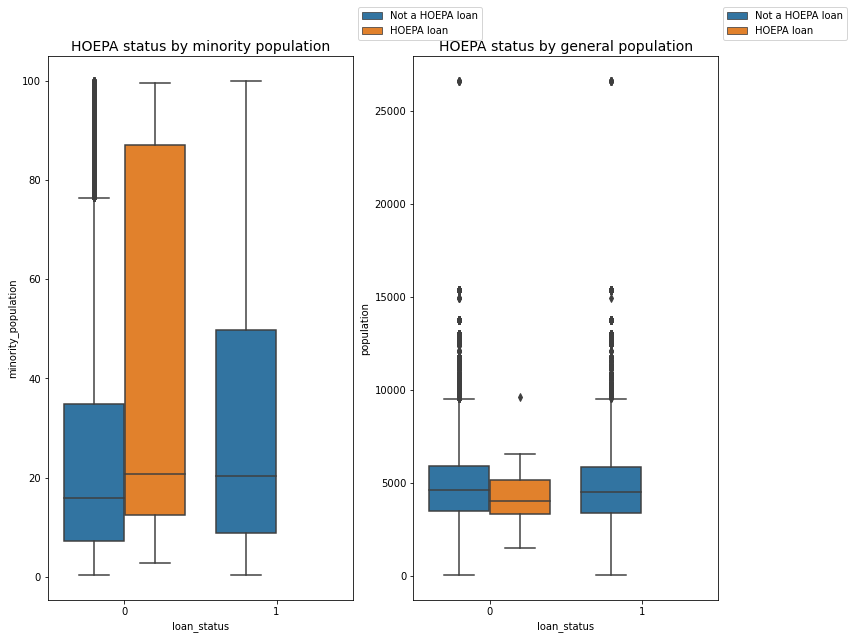

In [274]:
fig, ax = plt.subplots(1, 2, figsize=(12,10))

sns.boxplot(x='loan_status', y="minority_population", ax=ax[0],hue="hoepa_status_name", data=df)
ax[0].set_title('HOEPA status by minority population', fontsize=14)
ax[0].legend(bbox_to_anchor=(1, 1.1), loc=2)

sns.boxplot(x='loan_status', y="population", ax=ax[1],hue="hoepa_status_name", data=df)
ax[1].set_title('HOEPA status by general population', fontsize=14)
ax[1].legend(bbox_to_anchor=(1, 1.1), loc=2)

Minority population have a much higher chance of getting their loan accepted, when it's subject to the HOEPA. We don't see such a pattern for the general population.

It seems that not gender is a deciding factor that influences the loan status, but rather ethnicity and race. 

The question is, if this pattern is not rather influenced by income, which will be explored in the next part.

### Loan amount and income by gender and race - pattern for denying loans

Text(0.5, 1.0, 'Income and loan amount by race')

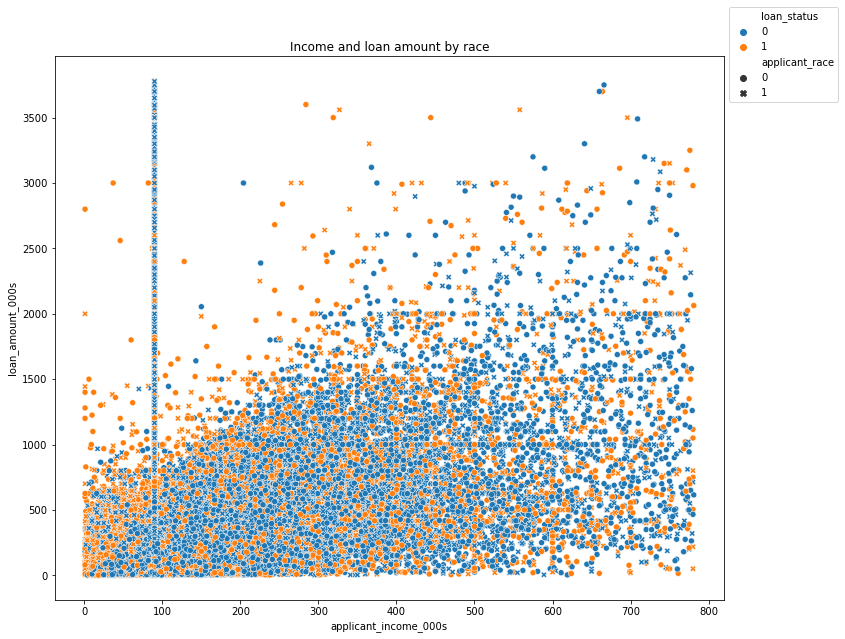

In [276]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='applicant_income_000s', y='loan_amount_000s', hue='loan_status', style='applicant_race')
plt.legend(bbox_to_anchor=(1, 1.1), loc=2)
plt.title('Income and loan amount by race')  

It's hard to find a pattern in this scatterplot, let's look at the numbers.

In [249]:
df.groupby(['loan_status','applicant_race_name_1'])['loan_amount_000s','applicant_income_000s'].describe()

/var/folders/2f/lk12d48976zgcfccgd8q1c6r0000gn/T/ipykernel_81471/3756835728.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['loan_status','applicant_race_name_1'])['loan_amount_000s','applicant_income_000s'].describe()


loan_amount_000s  \
                                                                          count   
loan_status applicant_race_name_1                                                 
0           American Indian or Alaska Native                              316.0   
            Asian                                                        7081.0   
            Black or African American                                    6137.0   
            Information not provided by applicant in mail, ...           9285.0   
            Native Hawaiian or Other Pacific Islander                     276.0   
            Not applicable                                              19015.0   
            White                                                       76983.0   
1           American Indian or Alaska Native                              393.0   
            Asian                                                        3847.0   
            Black or African American                                    5321.0   
            Information not provided by applicant in mail, ...           8380.0   
            Native Hawaiian or Other Pacific Islander                     231.0   
            Not applicable                                                475.0   
            White                                                       34179.0   

                                                                            \
                                                                      mean   
loan_status applicant_race_name_1                                            
0           American Indian or Alaska Native                    233.740506   
            Asian                                               387.902132   
            Black or African American                           282.891478   
            Information not provided by applicant in mail, ...  323.741626   
            Native Hawaiian or Other Pacific Islander           269.452899   
            Not applicable                                      336.928162   
            White                                               242.084330   
1           American Indian or Alaska Native                    167.162850   
            Asian                                               389.940733   
            Black or African American                           236.445969   
            Information not provided by applicant in mail, ...  284.869809   
            Native Hawaiian or Other Pacific Islander           217.575758   
            Not applicable                                      884.010526   
            White                                               251.885456   

                                                                            \
                                                                       std   
loan_status applicant_race_name_1                                            
0           American Indian or Alaska Native                    221.345616   
            Asian                                               260.966575   
            Black or African American                           177.459161   
            Information not provided by applicant in mail, ...  313.928852   
            Native Hawaiian or Other Pacific Islander           182.581891   
            Not applicable                                      415.916054   
            White                                               243.166340   
1           American Indian or Alaska Native                    166.223644   
            Asian                                               326.100918   
            Black or African American                           184.390272   
            Information not provided by applicant in mail, ...  327.758694   
            Native Hawaiian or Other Pacific Islander           189.267586   
            Not applicable                                      876.918895   
            White                                               275.216577  

- Minority population, especially Black or African Americans, get rejected or withdraws from smaller loans and rather accepted when they apply for bigger loans. 
- This could be, because for accepted loans we also find a noticeable bigger income for these groups, leading to a better status and thus getting their loan accepted.
- White people get more rejected for bigger loans. 
- Interestingly, we don't find a really big income difference for white people getting their loans accepted or rejected.

Text(0.5, 1.0, 'Income and loan amount by gender')

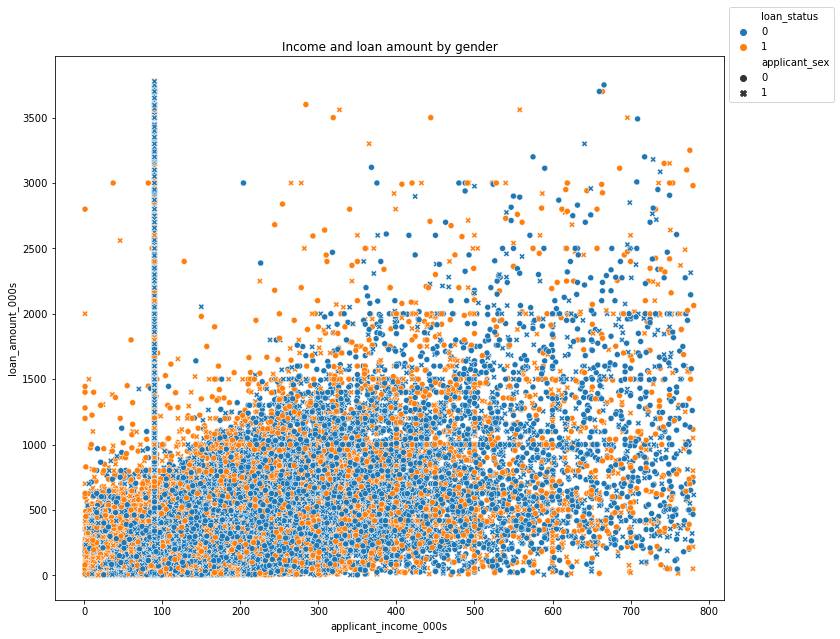

In [277]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='applicant_income_000s', y='loan_amount_000s', hue='loan_status', style='applicant_sex')
plt.legend(bbox_to_anchor=(1, 1.1), loc=2)
plt.title('Income and loan amount by gender')  

It's hard to find a pattern here. Let's look at the numbers.

In [251]:
df.groupby(['loan_status','applicant_sex_name'])['loan_amount_000s','applicant_income_000s'].describe()

/var/folders/2f/lk12d48976zgcfccgd8q1c6r0000gn/T/ipykernel_81471/375194254.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['loan_status','applicant_sex_name'])['loan_amount_000s','applicant_income_000s'].describe()


loan_amount_000s  \
                                                                          count   
loan_status applicant_sex_name                                                    
0           Female                                                      31195.0   
            Information not provided by applicant in mail, ...           5480.0   
            Male                                                        63414.0   
            Not applicable                                              19004.0   
1           Female                                                      16250.0   
            Information not provided by applicant in mail, ...           4761.0   
            Male                                                        31345.0   
            Not applicable                                                470.0   

                                                                            \
                                                                      mean   
loan_status applicant_sex_name                                               
0           Female                                              225.663343   
            Information not provided by applicant in mail, ...  323.867518   
            Male                                                275.378733   
            Not applicable                                      336.921174   
1           Female                                              221.744431   
            Information not provided by applicant in mail, ...  285.547784   
            Male                                                284.237965   
            Not applicable                                      889.817021   

                                                                            \
                                                                       std   
loan_status applicant_sex_name                                               
0           Female                                              210.329595   
            Information not provided by applicant in mail, ...  342.855852   
            Male                                                259.014089   
            Not applicable                                      415.800741   
1           Female                                              228.964017   
            Information not provided by applicant in mail, ...  346.373867   
            Male                                                293.978914   
            Not applicable                                      879.669945   

                                                                            \
                                                                min    25%   
loan_status applicant_sex_name                                               
0           Female                                              1.0   90.0   
            Information not provided by applicant in mail, ...  1.0  116.0   
            Male                                                1.0  111.0   
            Not applicable                                      1.0  125.0   
1           Female                                              1.0   70.0   
            Information not provided by applicant in mail, ...  1.0   87.0   
            Male                                                1.0  100.0   
            Not applicable                                      3.0  200.0   

                                                                       \
                                                                  50%   
loan_status applicant_sex_name                                          
0           Female                                              167.0   
            Information not provided by applicant in mail, ...  232.0   
            Male                                                215.0   
            Not applicable                                      246.0   
1           Female                                           

No clear pattern here for gender in loans getting denied or accepted, other than women are applying for fewer loans and smaller loans than men. It fit's, that women have on general lower income in the data, thus applying for smaller loans.

Next we explore the co-applicant. 

#### Co-applicant. 

Guideline questions

Does the race and gender of the co-applicant make a difference when getting a loan? Is it more likely for minority population to get a loan when the co-applicant is white?

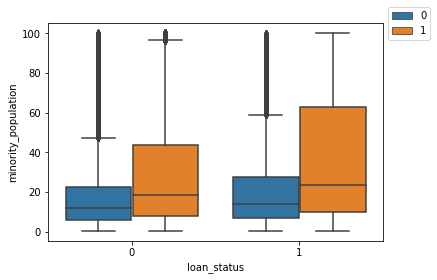

In [252]:
sns.boxplot(data=df, x='loan_status', y='minority_population', hue='co_applicant_race', palette="tab10") 
plt.legend(bbox_to_anchor=(1, 1.1), loc=2)

We see, that the chances are much higher getting a loan denied or withdrawn, when the co-applicant is also of minority population, meaning non white. On the same time, having a white co-applicant doesn't make it more likely to get a loan.

Do we have the same pattern for gender?

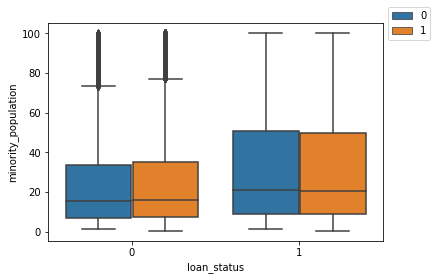

In [253]:
sns.boxplot(data=df, x='loan_status', y='minority_population', hue='co_applicant_sex', palette="tab10") 
plt.legend(bbox_to_anchor=(1, 1.1), loc=2)

Interestingly, no clear pattern for gender. For minority population a loan is as likely to get denied when the co-applicant is female as when he's male. It seems, that not gender is the deciding factor here, but rather ethnicity or race.

Let's look at the number for these feature combinations.

In [254]:
#reminder: 0 ='white, 1 = 'other'

df.groupby(['loan_status', 'applicant_race', 'co_applicant_race'])['loan_amount_000s','applicant_income_000s'].describe()

/var/folders/2f/lk12d48976zgcfccgd8q1c6r0000gn/T/ipykernel_81471/62257664.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['loan_status', 'applicant_race', 'co_applicant_race'])['loan_amount_000s','applicant_income_000s'].describe()


loan_amount_000s              \
                                                        count        mean   
loan_status applicant_race co_applicant_race                                
0           0              0                          34954.0  271.215111   
                           1                          42029.0  217.857313   
            1              0                            835.0  361.772455   
                           1                          41275.0  332.928431   
1           0              0                          13309.0  287.335112   
                           1                          20870.0  229.278869   
            1              0                            406.0  370.610837   
                           1                          18241.0  303.208815   

                                                                             \
                                                     std  min    25%    50%   
loan_status applicant_race co_applicant_race                                  
0           0              0                  253.726650  1.0  115.0  210.0   
                           1                  231.245626  1.0   84.0  150.0   
            1              0                  353.874069  3.0  150.0  274.0   
                           1                  342.477289  1.0  140.0  272.0   
1           0              0                  287.798084  1.0  110.0  220.0   
                           1                  264.420380  1.0   72.0  152.0   
            1              0                  403.413327  3.0  129.0  274.0   
                           1                  333.646680  1.0  101.0  246.0   

                                                             \
                                                75%     max   
loan_status applicant_race co_applicant_race                  
0           0              0                  352.0  3611.0   
                           1                  288.0  3750.0   
            1              0                  438.0  3750.0   
                           1                  409.0  3777.0   
1           0              0                  374.0  3500.0   
                           1                  305.0  3700.0   
            1              0                  422.5  3000.0   
                           1                  388.0  3780.0   

                                             applicant_income_000s  \
                                                             count   
loan_status applicant_race co_applicant_race                         
0           0              0                               34954.0   
                           1                               42029.0   
            1              0                                 835.0   
                           1                               41275.0   
1           0              0                               13309.0   
                           1                               20870.0   
            1              0                                 406.0   
                           1                               18241.0   

                                                                            \
                                                    mean         std   min   
loan_status applicant_race co_applicant_race                                 
0           0              0                  138.934657  100.915643   1.0   
                           1                   96.193390   87.702548   1.0   
            1              0                  149.784431  109.391642  12.0   
                           1                  111.462023   81.140689   1.0   
1           0              0                  134.017131  103.949891   1.0   
                           1                   96.767465   93.169722   1.0   
            1              0                  154.322660  125.244302  18.0   
                           1                  108.997862   92.932565   1.0   

   

For loan accepted we see, that a white applicant get's a smaller loan when the co-applicant is not white and a bigger loan when the co-applicant is also white.

For a non-white applicant we see, that they get bigger loans, when the co-applicant is white and a smaller loan when the co-applicant is non white.

We see the same pattern in the income. So it would need to be further investigated what is the deciding factor here, income or ethnicity or a different reason that needs to be uncovered.

Do we find a similar pattern for gender?

##### Explore gender

Gudeline question

Does it help a woman to have a male co_applicant? Do they get higher loans?

In [255]:
df.groupby(['loan_status', 'applicant_sex', 'co_applicant_sex'])['loan_amount_000s','applicant_income_000s'].describe()

/var/folders/2f/lk12d48976zgcfccgd8q1c6r0000gn/T/ipykernel_81471/947259431.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['loan_status', 'applicant_sex', 'co_applicant_sex'])['loan_amount_000s','applicant_income_000s'].describe()


loan_amount_000s              \
                                                      count        mean   
loan_status applicant_sex co_applicant_sex                                
0           0             0                          1815.0  353.758678   
                          1                         61599.0  273.069287   
            1             0                          9078.0  262.084600   
                          1                         46601.0  275.487822   
1           0             0                           937.0  350.153682   
                          1                         30408.0  282.206821   
            1             0                          4015.0  263.212951   
                          1                         17466.0  247.581244   

                                                                           \
                                                   std  min    25%    50%   
loan_status applicant_sex co_applicant_sex                                  
0           0             0                 265.064507  3.0  175.5  315.0   
                          1                 258.475641  1.0  110.0  211.0   
            1             0                 242.535830  1.0  107.0  204.0   
                          1                 325.453937  1.0  101.0  196.0   
1           0             0                 286.129121  1.0  170.0  303.0   
                          1                 293.987422  1.0  100.0  215.0   
            1             0                 254.464382  1.0   95.0  207.0   
                          1                 315.323073  1.0   70.0  167.0   

                                                           \
                                              75%     max   
loan_status applicant_sex co_applicant_sex                  
0           0             0                 450.0  2405.0   
                          1                 361.0  3750.0   
            1             0                 356.0  3750.0   
                          1                 350.0  3777.0   
1           0             0                 450.0  3000.0   
                          1                 371.0  3700.0   
            1             0                 355.0  3150.0   
                          1                 320.0  3780.0   

                                           applicant_income_000s              \
                                                           count        mean   
loan_status applicant_sex co_applicant_sex                                     
0           0             0                               1815.0  161.813774   
                          1                              61599.0  123.110862   
            1             0                               9078.0  131.304032   
                          1                              46601.0   97.760198   
1           0             0                                937.0  148.259338   
                          1                              30408.0  117.896179   
            1             0                               4015.0  126.869489   
                          1                              17466.0   92.795660   

                                                                           \
                                                   std   min   25%    50%   
loan_status applicant_sex co_applicant_sex                                  
0           0             0                 124.731414  12.0  89.0  116.0   
                          1                 100.631743   1.0  65.0   92.0   
            1             0                  91.569410   3.0  80.0  105.0   
                          1                  72.501567   1.0  63.0   90.0   
1           0             0                 120.563713   4.0  80.0  105.0   
                          1                 102.703336   1.0  60.0   90.0   
            1             0                  94.745745   1.0  71.0   96.0   
                          1                  8

Interestingly, for gender we don't see a pattern that is as detectable as for ethnicity. As has been shown througout the analysis, gender most likely only in combination with ethnicity is playing a significant role in influencing the targer feature.

### "*correlation does not imply causation*"

When seeing the correlation between ethnicity and the target feature througout the analysis, it doesn't mean that one causes the other. Probably a third factor like income and location also plays strongly into this, making the interpretation complex, like it's the case with structural discrimination.

That other factors might be at play we see, when we further look at the relationship between location and minority population

In [256]:
feat_info('msamd_name')

The Metropolitian Statistical Area/Metropolitian Division (MSA/MD) the property is located in. An MSA is a region with relatively high population density at its core (usually a single large city) and close economic ties throughout. Larger MSAs are divided into MDs.


In [257]:
df['msamd_name'].nunique()

15

In [258]:
feat_info('county_name')

The name of the county containing the property.


In [259]:
df['county_name'].nunique()

62

Let's take the feature with less unique values to analyze our data.

Do we see a pattern how minority population is distributed across regions?

[Text(0, 0, 'unknown'),
 Text(1, 0, 'Buffalo, Cheektowaga, Niagara Falls - NY'),
 Text(2, 0, 'New York, Jersey City, White Plains - NY, NJ'),
 Text(3, 0, 'Syracuse - NY'),
 Text(4, 0, 'Albany, Schenectady, Troy - NY'),
 Text(5, 0, 'Binghamton - NY'),
 Text(6, 0, 'Rochester - NY'),
 Text(7, 0, 'Dutchess County, Putnam County - NY'),
 Text(8, 0, 'Nassau County, Suffolk County - NY'),
 Text(9, 0, 'Kingston - NY'),
 Text(10, 0, 'Ithaca - NY'),
 Text(11, 0, 'Elmira - NY'),
 Text(12, 0, 'Glens Falls - NY'),
 Text(13, 0, 'Utica, Rome - NY'),
 Text(14, 0, 'Watertown, Fort Drum - NY')]

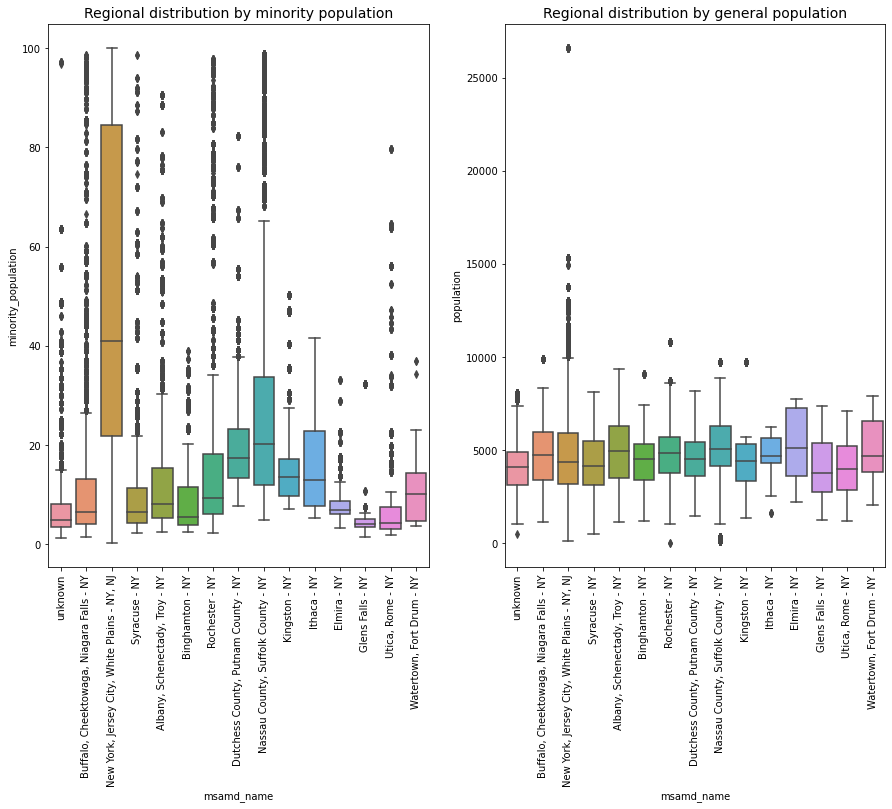

In [278]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
list = df['msamd_name'].unique()

sns.boxplot(x='msamd_name',y='minority_population',ax=ax[0], data=df)
ax[0].set_title('Regional distribution by minority population', fontsize=14)
ax[0].set_xticklabels(list, rotation = 90)

sns.boxplot(x='msamd_name',y='population',ax=ax[1], data=df)
ax[1].set_title('Regional distribution by general population', fontsize=14)
ax[1].set_xticklabels(list, rotation = 90)

From this two graps we see, that the general population is evenly distributed across the regions. Whereas minority population we mainly find in the two most densely populated regions.

## Summary
<a id='summary'></a>

#### The most important insights found in the data analysis

- The strongest correlation for the target column 'loan_status' we find for features connected to ethnicity/race.
- Income and loan amount are correlated, but the income alone is not the deciding factor if a loan get's approved or not. Here, especially features connected to ethnicity/race come into play.
- All the other features that are plotted against the target column don't really influence if a loan is being denied or not.
- We only see a difference when we add the factor ethnicity/race. This is not only the case for the target feature, but ethnicity/race influences all the other features as well.
- Even looking at the gender feature alone hardly makes a difference in the data. But when combining gender with features about ethnicity/race, it becomes the most deciding factor in a loan being denied or withdrawn.
- Difficult to say, if a loan being denied for minority population is causality or correlation, as they differ from the general population in all other important aspects like income, location they live in etc.
- This data is clearly showing a structural problem.